# Assignment- Classification Algorithm

Classification Algorithm is a supervised learning model. It is used when the data set contains descrete values.

#### Load required libraries

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#### Import Data Set

In [329]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [330]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [331]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [332]:
#Convert to data frame
df=pd.DataFrame(data.data, columns=data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [333]:
#adding  target column
df['target']=data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [334]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

breast_cancer data set, which is available in the sklearn library is imported and converted into data frame

### Data Pre-processing

**Check the shape of the data frame**

In [335]:
df.shape

(569, 31)

The Data Frame has 569 rows and 31 coloumns including target

**Check the column names and data type**

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

30 column names are present. The values are float data type. It can also be inferred that there are no null values, from the non-null count

**Check missing values**

In [337]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

This data does not have any missing values

**Remove Duplicates**

In [338]:
df.drop_duplicates(inplace=True)

In [339]:
df.shape

(569, 31)

Duplicate rows were not present

**Independent and Dependant Variable**

In [340]:
X = df.drop('target',axis=1)
Y = df['target']

**Standardisation**

In [341]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

The dataset contains features with different scales (e.g., mean radius vs mean texture). Feature scaling ensures that all features contribute equally to the model’s performance.StandardScaler, which standardizes the data by removing the mean and scaling to unit variance is used. This is important for algorithms like Logistic Regression, SVM, and k-NN, which are sensitive to the scale of input data

**Split Data**

In [342]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [343]:
y_train

68     1
181    0
63     1
248    1
60     1
      ..
71     1
106    1
270    1
435    0
102    1
Name: target, Length: 455, dtype: int64

The data is splitted randomly into test and train. The data in x_train and y_train will be used for training the model and the data in x_test will be used for testing the built model.

## Classification Algorithm Implementation

###  Logistic Regression

Logistic Regression is a linear model used for binary classification. It estimates the probability of a binary response based on one or more predictor variables. This model is a good choice for problems where the decision boundary is linear.

In [344]:
modelLogistic=LogisticRegression()

In [345]:
modelLogistic.fit(x_train,y_train)

LogisticRegression()

In [346]:
y_predict=modelLogistic.predict(x_test)

In [347]:
#finding accuracy of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
accuracy_linear=accuracy_score(y_test,y_predict)
precision_linear = precision_score(y_test, y_predict)
recall_linear = recall_score(y_test, y_predict)
f1_linear = f1_score(y_test, y_predict)

# Display metrics
print(f"Accuracy: {accuracy_linear:.2f}")
print(f"Precision: {precision_linear:.2f}")
print(f"Recall: {recall_linear:.2f}")
print(f"F1-Score: {f1_linear:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_predict))

Accuracy: 0.97
Precision: 0.97
Recall: 0.99
F1-Score: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



###  Decision Tree Classifier

Decision Trees split data into branches based on feature values. Each branch corresponds to a decision based on a feature. They work well for both classification and regression tasks and can handle both numerical and categorical data. They are non-linear models.

In [348]:
from sklearn.tree import DecisionTreeClassifier
modelDecisionTree = DecisionTreeClassifier()

In [349]:
modelDecisionTree.fit(x_train,y_train)

DecisionTreeClassifier()

In [350]:
y_predict2=modelDecisionTree.predict(x_test)

In [351]:
accuracy_dt = accuracy_score(y_test, y_predict2)
precision_dt = precision_score(y_test, y_predict2)
recall_dt = recall_score(y_test, y_predict2)
f1_dt = f1_score(y_test, y_predict2)

# Display metrics
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1-Score: {f1_dt:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_predict2))

Accuracy: 0.95
Precision: 0.96
Recall: 0.96
F1-Score: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



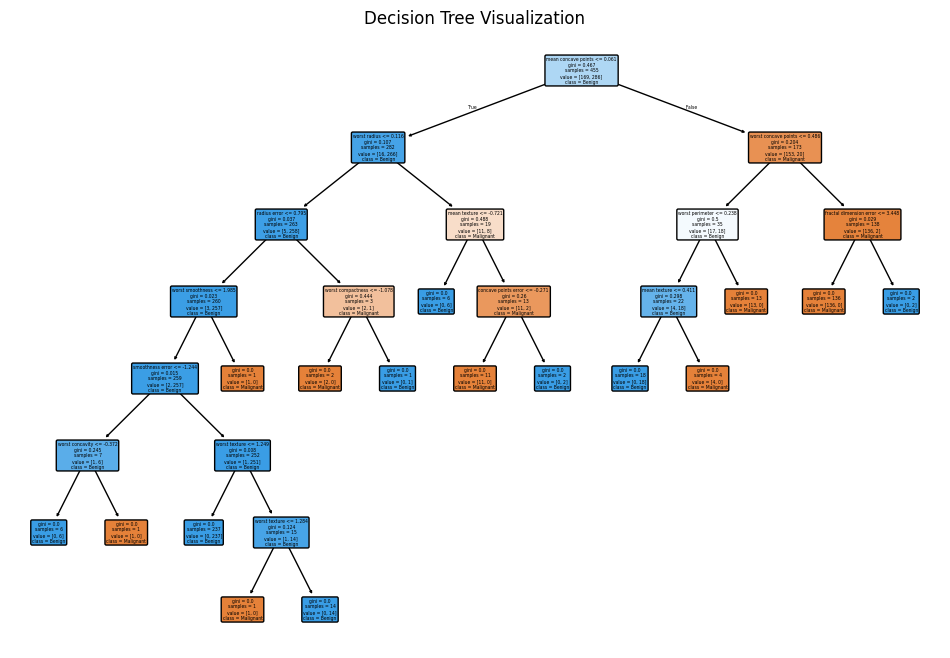

In [352]:
plt.figure(figsize=(12, 8))
tree.plot_tree(modelDecisionTree, feature_names=X.columns, class_names=['Malignant', 'Benign'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

### Random Forest Classifier

Random Forest is an ensemble learning method that creates multiple decision trees and combines their results. It reduces overfitting and generally performs better than individual decision trees.

In [353]:
from sklearn.ensemble import RandomForestClassifier
modelRandomForest=RandomForestClassifier()

In [354]:
modelRandomForest.fit(x_train,y_train)

RandomForestClassifier()

In [355]:
y_predict3=modelRandomForest.predict(x_test)

In [356]:
accuracy_rf = accuracy_score(y_test, y_predict3)
precision_rf = precision_score(y_test, y_predict3)
recall_rf = recall_score(y_test, y_predict3)
f1_rf = f1_score(y_test, y_predict3)

# Display metrics
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_predict3))

Accuracy: 0.96
Precision: 0.96
Recall: 0.99
F1-Score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Support Vector Machine

SVM finds the hyperplane that best separates the classes in the feature space. It’s particularly useful for high-dimensional data and can be effective even when the classes are not linearly separable, using kernels to map data to higher dimensions.

In [357]:
from sklearn.svm import SVC
modelSVC=SVC()

In [358]:
modelSVC.fit(x_train,y_train)

SVC()

In [359]:
y_predict4=modelSVC.predict(x_test)

In [360]:
accuracy_svc = accuracy_score(y_test, y_predict4)
precision_svc = precision_score(y_test, y_predict4)
recall_svc = recall_score(y_test, y_predict4)
f1_svc = f1_score(y_test, y_predict4)

# Display metrics
print(f"Accuracy: {accuracy_svc:.2f}")
print(f"Precision: {precision_svc:.2f}")
print(f"Recall: {recall_svc:.2f}")
print(f"F1-Score: {f1_svc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_predict4))

Accuracy: 0.97
Precision: 0.97
Recall: 0.99
F1-Score: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### k-Nearest Neighbors (k-NN)

k-NN is a non-parametric method that classifies a data point based on the majority class of its 'k' nearest neighbors. It’s simple to implement and works well when the decision boundary is complex.

In [361]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN=KNeighborsClassifier()

In [362]:
modelKNN.fit(x_train, y_train)

KNeighborsClassifier()

In [363]:
y_predict5=modelKNN.predict(x_test)

In [364]:
accuracy_knn = accuracy_score(y_test, y_predict5)
precision_knn = precision_score(y_test, y_predict5)
recall_knn = recall_score(y_test, y_predict5)
f1_knn = f1_score(y_test, y_predict5)

# Display metrics
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1-Score: {f1_knn:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_predict5))

Accuracy: 0.95
Precision: 0.96
Recall: 0.96
F1-Score: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Model Comparison

In [365]:
print(f"Accuracy of Liner Regression: {accuracy_liner:.2f}")
print(f"Accuracy of Decision Tree Classifier: {accuracy_dt:.2f}")
print(f"Accuracy of Random Forest classifier: {accuracy_rf:.2f}")
print(f"Accuracy of Support Vector Machine: {accuracy_svc:.2f}")
print(f"Accuracy of knn: {accuracy_knn:.2f}")

Accuracy of Liner Regression: 0.97
Accuracy of Decision Tree Classifier: 0.95
Accuracy of Random Forest classifier: 0.96
Accuracy of Support Vector Machine: 0.97
Accuracy of knn: 0.95


In [366]:
# Find the maximum accuracy and the corresponding classifier
accuracies = {
    "Linear Regression": accuracy_liner,
    "Decision Tree Classifier": accuracy_dt,
    "Random Forest Classifier": accuracy_rf,
    "Support Vector Machine": accuracy_svc,
    "KNN": accuracy_knn
}

# Find the classifier with maximum accuracy
max_accuracy_classifier = max(accuracies, key=accuracies.get)
max_accuracy_value = accuracies[max_accuracy_classifier]

# Print the maximum accuracy
print(f"\nThe maximum accuracy is {max_accuracy_value:.2f} for {max_accuracy_classifier}.")


The maximum accuracy is 0.97 for Linear Regression.


Best model varies for each data set. For this data set, LinearRegression and Support Vecotor are the best performing.